In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('yacht_hydrodynamics', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('yacht_hydrodynamics', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('yacht_hydrodynamics')
num_tries = 15

dataset_shapes

([6], [1])

# Scalar network without hidden layers

Average elapsed k-fold validation time: 76.36545 sec
Last measures: [0.033472607284784316, 0.027716172393411398, 0.008150260709226132, 0.055979049392044546, 0.008047993201762438]


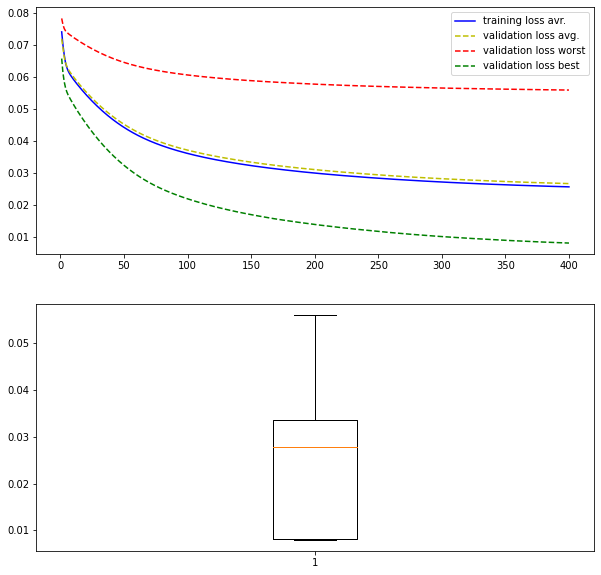

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Scalar network with one hidden layer

### S(2)

Average elapsed k-fold validation time: 83.06558 sec
Last measures: [0.003756444016471505, 0.053989614360034466, 0.04932456570677459, 0.05398334856145084, 0.04969007140025496]


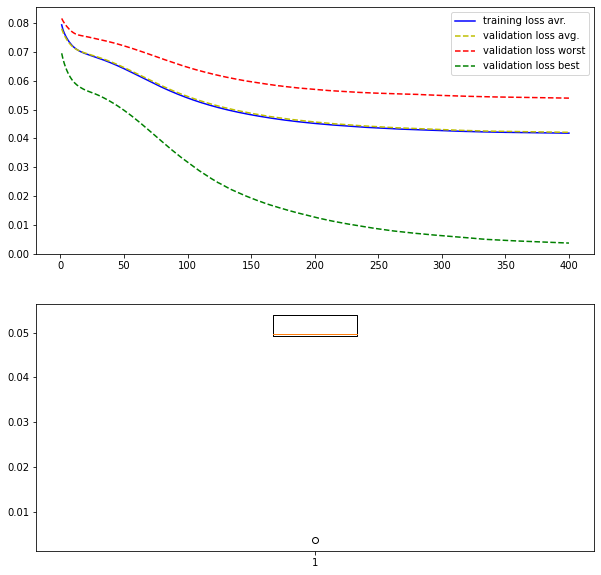

In [4]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(5)

Average elapsed k-fold validation time: 83.23016 sec
Last measures: [0.05368820005096495, 0.03254910062532872, 0.03282986283302307, 0.046363527048379184, 0.05718724001199007]


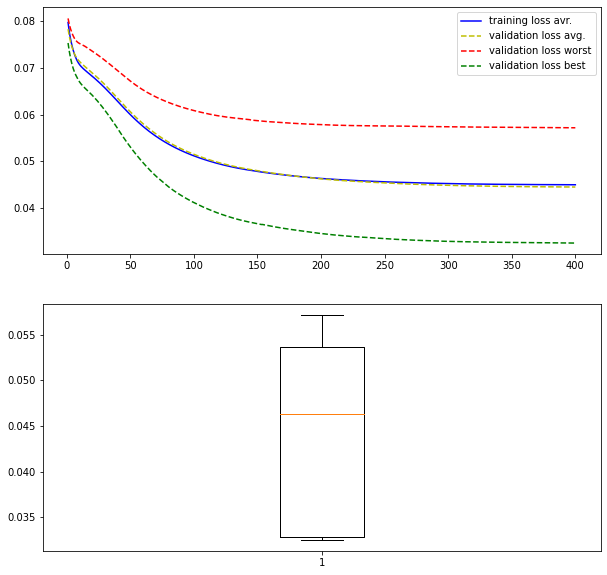

In [5]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(15)

Average elapsed k-fold validation time: 82.56430 sec
Last measures: [0.07036621016450226, 0.04064444084651768, 0.01593775926157832, 0.03277786932885647, 0.06756366845220327]


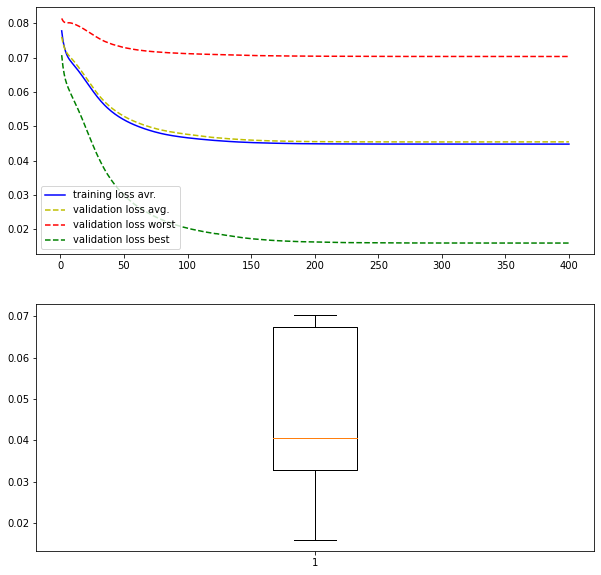

In [6]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[15], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(30)

Average elapsed k-fold validation time: 82.50653 sec
Last measures: [0.04945790730416775, 0.03289615595713258, 0.054155831784009935, 0.04938445538282395, 0.032739050965756175]


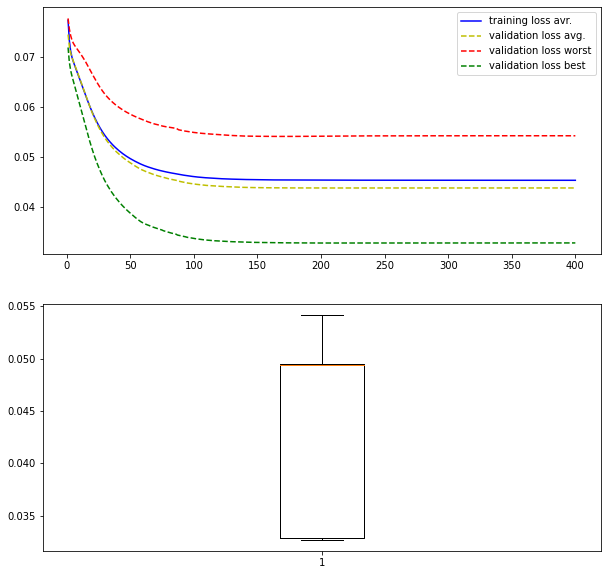

In [7]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[30], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Scalar network with three hidden layers

### S(2,2,2)

Average elapsed k-fold validation time: 94.15044 sec
Last measures: [0.05815392378717661, 0.07188221216201782, 0.05868001338094473, 0.061924143601208924, 0.07550731375813484]


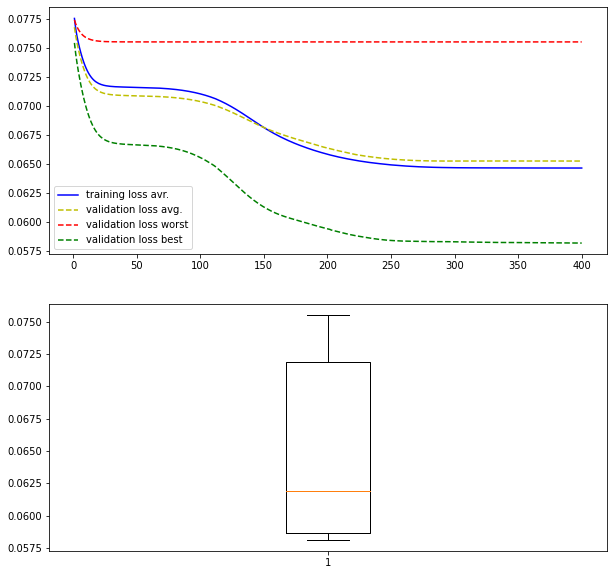

In [8]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2,2,2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### S(10,7,5)

Average elapsed k-fold validation time: 92.90851 sec
Last measures: [0.03237360916100442, 0.06705646910704673, 0.06294163167476655, 0.01581895010313019, 0.0400594849139452]


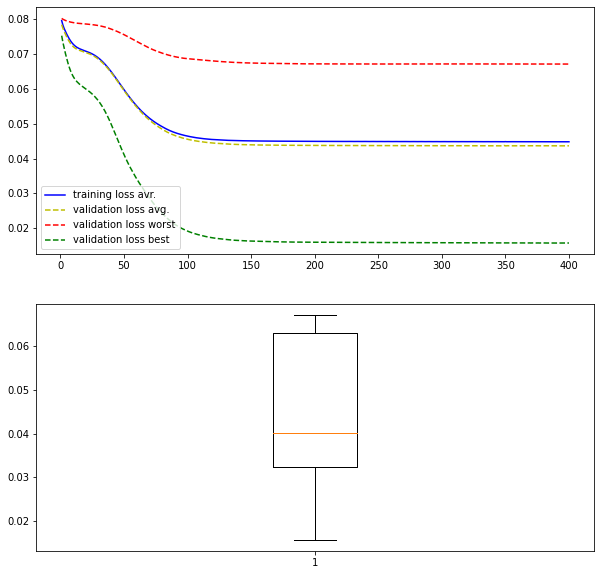

In [9]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[10,7,5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Vector network with one hidden layer (c=1), unique weights

### V1(2):U(2)

Average elapsed k-fold validation time: 97.38111 sec
Last measures: [0.03287073150277138, 0.03264629931654781, 0.031761423754505816, 0.05449965144507587, 0.06737373061478139]


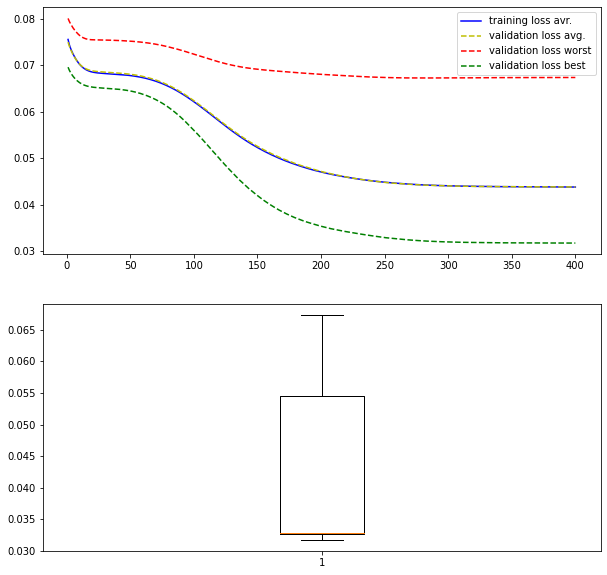

In [10]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### V1(5):U(2)

Average elapsed k-fold validation time: 98.18694 sec
Last measures: [0.04569749733200297, 0.0541119507048279, 0.05360200547147542, 0.02828575725434348, 0.06188142494065687]


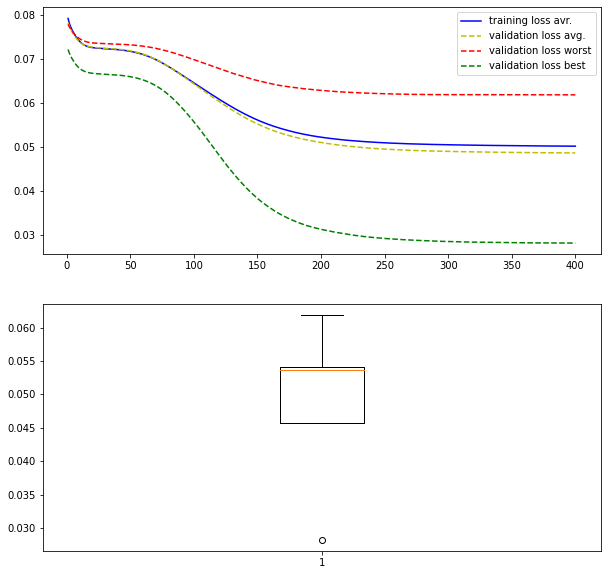

In [11]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

# Vector network with one hidden layer (c=1), shared weights

### V1(2):S(2)

Average elapsed k-fold validation time: 103.89205 sec
Last measures: [0.040715658222325146, 0.04892533365637064, 0.05653733480721712, 0.06325123636052013, 0.05007630214095116]


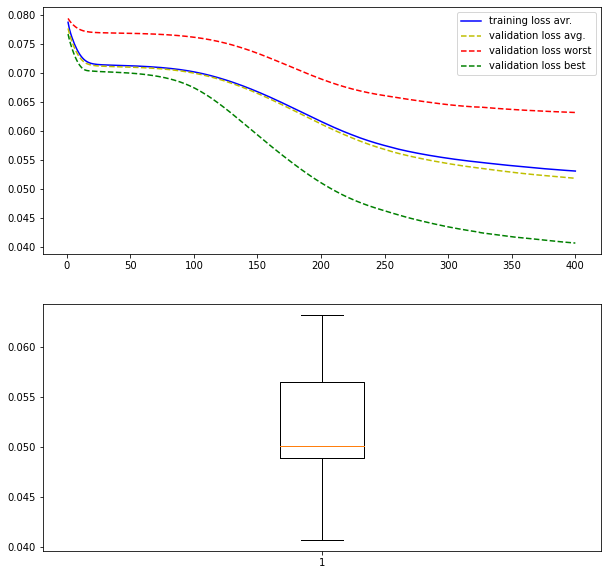

In [12]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### V1(5):S(2)

Average elapsed k-fold validation time: 107.43339 sec
Last measures: [0.03690722920000553, 0.051585217798128725, 0.04869708335027099, 0.04347321931272745, 0.019307575514540078]


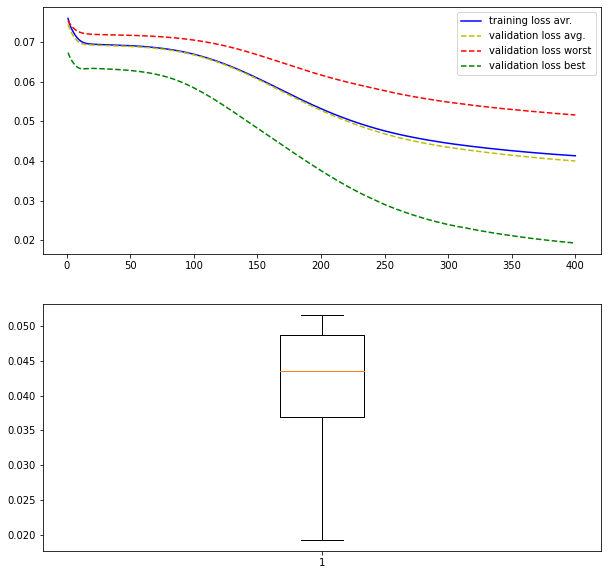

In [13]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=400, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")